In [1]:
#!kaggle datasets download "valakhorasani/gym-members-exercise-dataset" -p data --unzip


In [2]:
ls -l /home/seal/.kaggle/kaggle.json


-rw------- 1 seal seal 74 Jan 14 20:58 /home/seal/.kaggle/kaggle.json


In [3]:
import pandas as pd

data_path = 'data/gym_members_exercise_tracking.csv'  # Update the filename if necessary
df = pd.read_csv(data_path)

df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [4]:
for col in df:
    print(str(col) + ": " + str(len(df[col].unique())))

Age: 42
Gender: 2
Weight (kg): 532
Height (m): 51
Max_BPM: 40
Avg_BPM: 50
Resting_BPM: 25
Session_Duration (hours): 147
Calories_Burned: 621
Workout_Type: 4
Fat_Percentage: 239
Water_Intake (liters): 23
Workout_Frequency (days/week): 4
Experience_Level: 3
BMI: 771


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Step 1: Load the dataset
data_path = 'data/gym_members_exercise_tracking.csv'  # Replace with the actual file path
df = pd.read_csv(data_path)

# Step 2: Encode categorical variables manually
# Gender: Male = 0, Female = 1
df['Gender'] = df['Gender'].apply(lambda x: 0 if x == 'Male' else 1)

# Workout_Type: Assign numeric values to each workout type
workout_type_mapping = {workout: idx for idx, workout in enumerate(df['Workout_Type'].unique())}
df['Workout_Type'] = df['Workout_Type'].apply(lambda x: workout_type_mapping[x])

# Step 3: Define features (X) and target (y)
X = df.drop('Experience_Level', axis=1).values
y = df['Experience_Level'].values

# Step 4: Manual train-test split
def manual_train_test_split(X, y, test_size=0.2, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    split = int(len(X) * (1 - test_size))
    train_indices, test_indices = indices[:split], indices[split:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = manual_train_test_split(X, y)

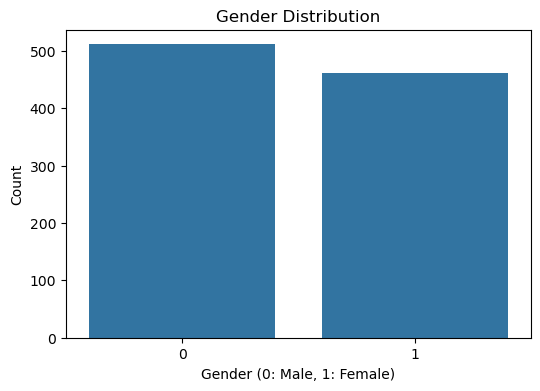

In [6]:
# Step 5: Visualizations
# 5.1: Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Count')
plt.show()



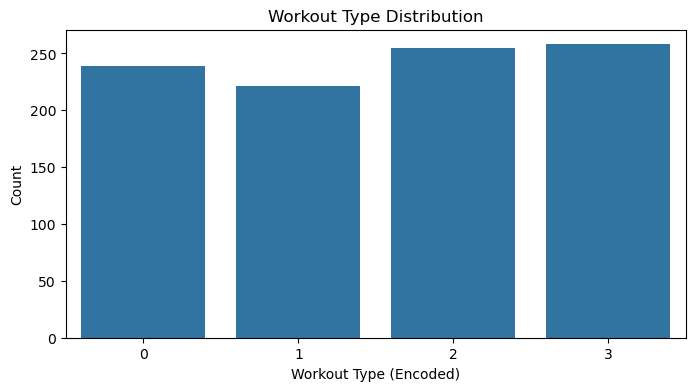

In [7]:
# 5.2: Workout Type Distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='Workout_Type', data=df)
plt.title('Workout Type Distribution')
plt.xlabel('Workout Type (Encoded)')
plt.ylabel('Count')
plt.show()



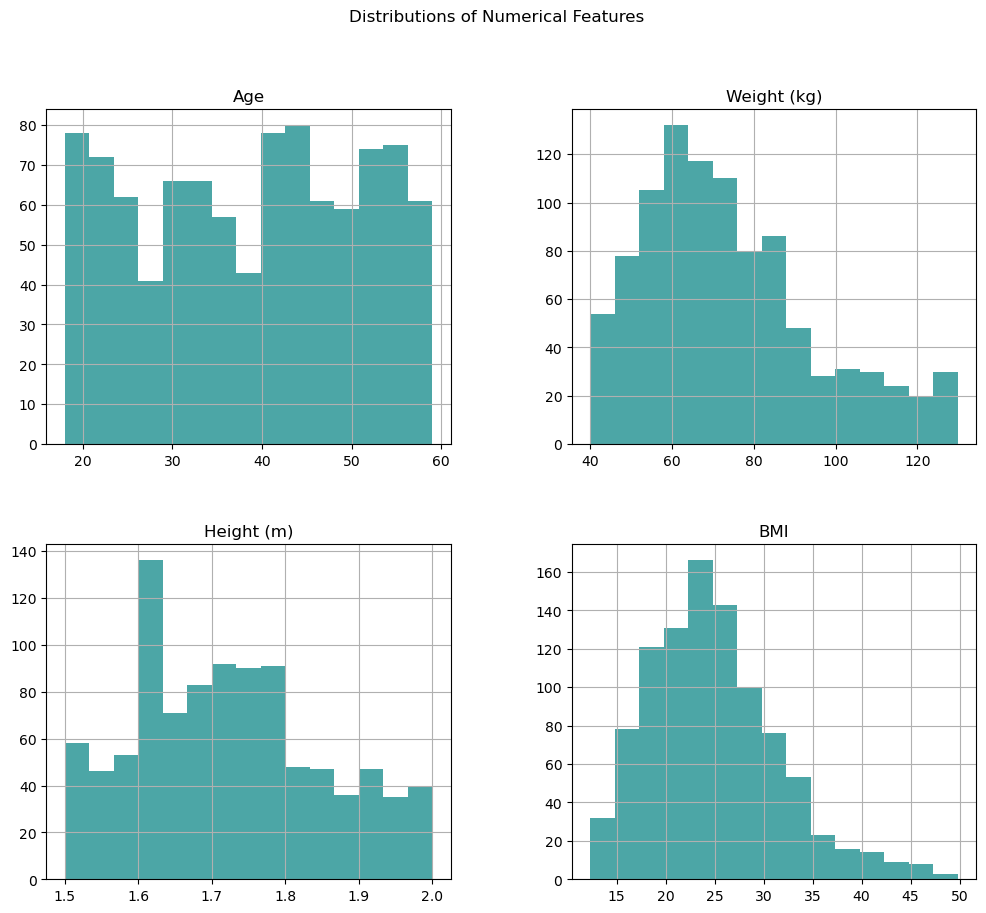

In [8]:
# 5.3: Numerical Feature Distributions
numerical_features = ['Age', 'Weight (kg)', 'Height (m)', 'BMI']
df[numerical_features].hist(bins=15, figsize=(12, 10), color='teal', alpha=0.7)
plt.suptitle('Distributions of Numerical Features')
plt.show()



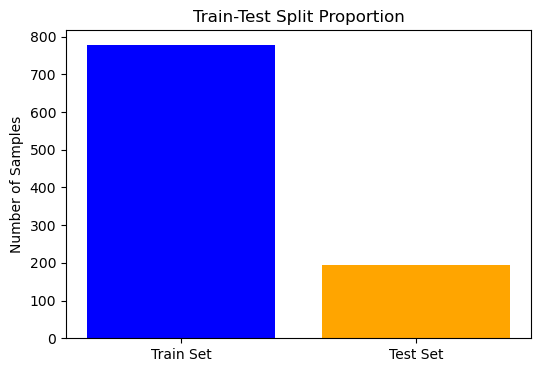

In [9]:
# 5.4: Train-Test Split Proportions
train_size = len(X_train)
test_size = len(X_test)
plt.figure(figsize=(6, 4))
plt.bar(['Train Set', 'Test Set'], [train_size, test_size], color=['blue', 'orange'])
plt.title('Train-Test Split Proportion')
plt.ylabel('Number of Samples')
plt.show()



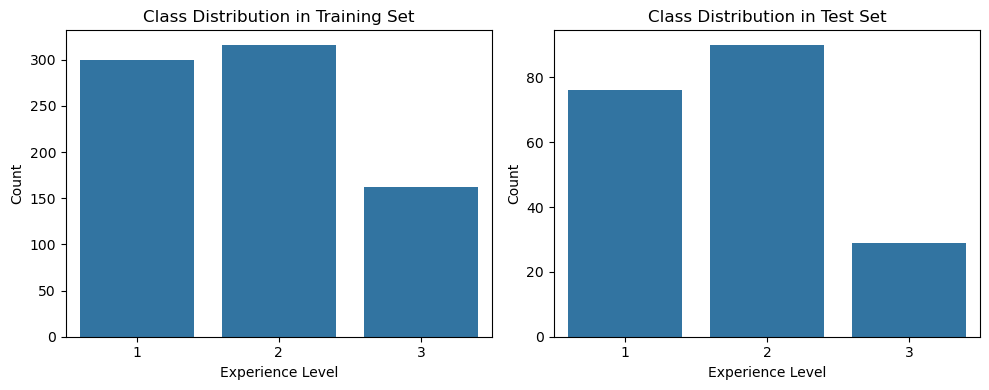

In [10]:
# 5.5: Target Class Distribution in Train and Test Sets
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Class Distribution in Training Set')
plt.xlabel('Experience Level')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x=y_test)
plt.title('Class Distribution in Test Set')
plt.xlabel('Experience Level')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



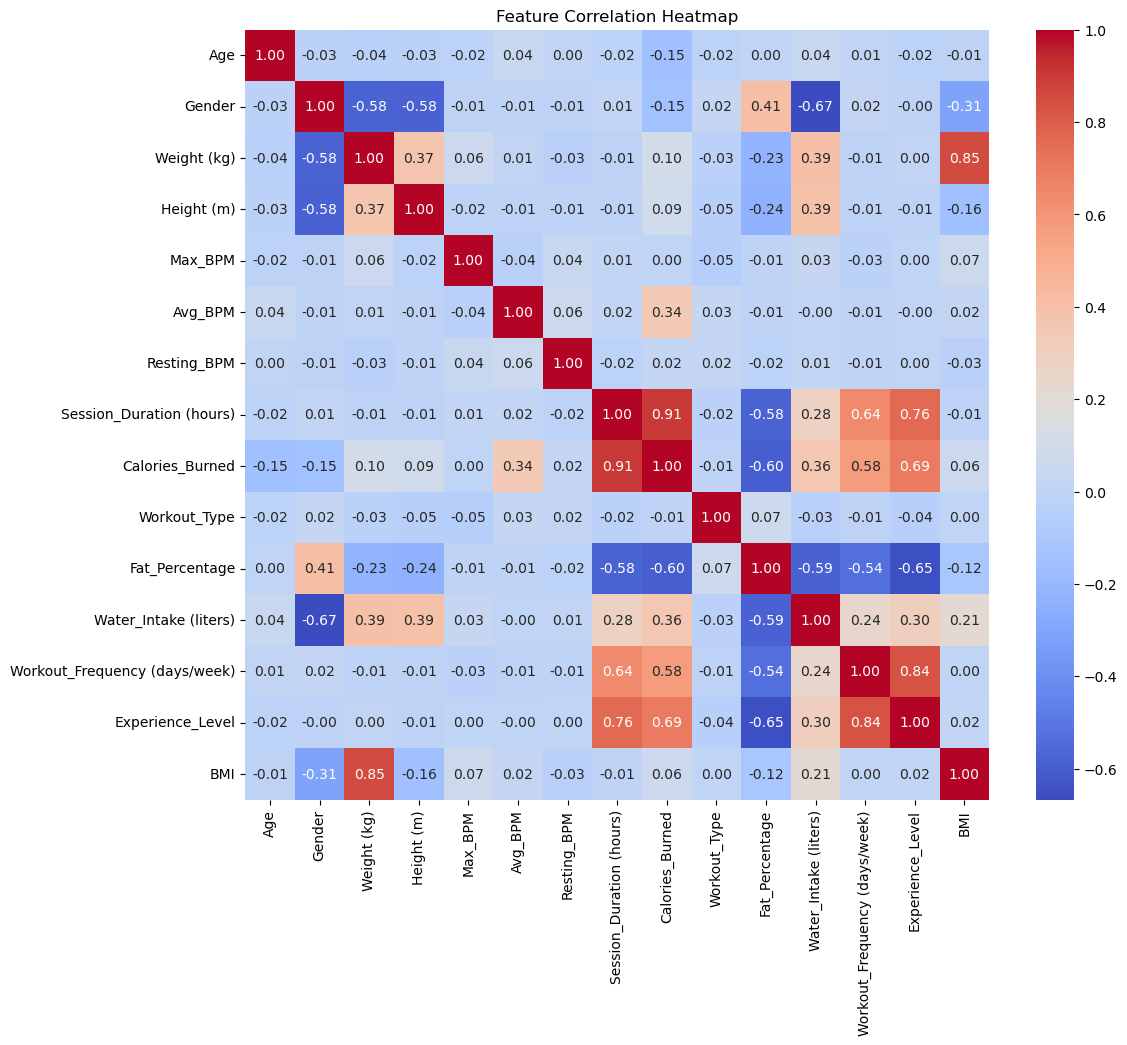

In [11]:
# 5.6: Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()